# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [14]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: PCA should try to create a composite feature from set of features which seems co-related.First PCA dimension will be one which covers maximum variation in the data.Since we are working for a Wholesale Grocery distributor,1st vector i.e the items which cover maximum variation in data will be the items which are bought on daily basis.Thus 1st vector can be combination of fresh and milk.While 2nd vector might comprise of slightly less regular but popular items like grocery and frozen itmes.

ICA on the otherhand will try to find more fundamental features which independantly contribute to the data.Since here we are using all 6 components.It will return vectors to all 6 features.However these ICA vectors will most likely be independent sources contributing to the features given in the problem. 



###PCA

In [15]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: First 2 PCA dimentions seem to cover about 86% variantion in the data(about 46% by 1st PCA vector and 40% by 2nd PCA vector).So the variance drops drastically after 2nd dimension.Since most of the data is covered by 1st 2 PCA components,its reasonable to use 2 dimensions for our analysis.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: PCA dimensions represent new set of super features which are a combination of original co-related features such that they cover maximum variation in the data.1st vector seems to represent mostly fresh plus some frozen items.2nd vector seems to represent Milk,Groceries and Detergents_paper.This information tells us that fresh and frozen are the most popular itmes that are being bought followed by milk,groceries and detergent_papers which can help store to focus their efforts mainly on these items to satisfy maximum audience.

Also it helps us to choose effective number of dimensions for clustering.Since most of the variance in the data is represented by these 2 vectors therefore we can perform feature reduction and reduce the number of features from 6 to 2 for this problem.Reducing number of dimensions not only helps in better visualisation of data,it also reduces the amount of data that is required to effectively learn useful information.According to curse of dimensionality as the dimesions increases more data is required to gather enough statistical significance to  produce reliable result in learning.So lower dimensions are prefered over higher dimensions.

Since PCA produces principal components which retains maximum information in data they can represent the data in simpler format(only in 2 dimensions instead of 6 in this case) and reduce calculation overhead.

###ICA

In [19]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing
scaled_data=preprocessing.scale(data)
ica = FastICA(n_components=6)
ica.fit(scaled_data)

# Print the independent components
print ica.components_


[[ 0.0109027   0.00133259 -0.00823917 -0.05405641  0.00293217  0.01676067]
 [ 0.00425291  0.05706625 -0.03210535 -0.00029557  0.0239162  -0.01494915]
 [ 0.00487151  0.00229888  0.00557797  0.00256833 -0.0021254  -0.05118375]
 [-0.00301599  0.04922397 -0.04180164 -0.00408355 -0.02988385 -0.00930233]
 [-0.00388997  0.00766853  0.13077641 -0.0062092  -0.12999767 -0.01535102]
 [ 0.05006365 -0.00698208 -0.00293563 -0.00345579  0.00639977 -0.0030676 ]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 1st ICA vector seem to represent mainly fresh,Delicatessen items and little bit of milk and detergents_papers.2nd vector seems to represent mostly groceries with some detergents_paper and little bit of fresh items.3rd vector represents little bit of fresh ,milk, grocery and frozen.4th vector seems to represent only milk.5th vectors seems to contain mostly Groceries and little bit of milk.6th vector is mainly for fresh items with little bit of detergents_paper.

These vectors gives us insight on the origin of these customer purchases.e.g-1st vector seems to represent a resturant.2nd vector seems to be a motel.3rd vector seems to represent a mini-mart.4th vector seems like a coffee shop.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer:  I chose Gaussian Mixture Models for this problem.
         Advantages of using GMM over K means are that unlike K means which uses hard assignment,GMM uses soft assignment i.e In K means a data point is assigned to a cluster with certainity.In next iteration it might change the cluster and assign the data point to another cluster.However GMM does not assign a datapoint with 100% certainity.Instead it uses probability to determine which cluster the datapoint is more likely to belong.GMM works well when there is no clear seperation in the data and clusters can overlap.It gives importance to strength of association of an element to a cluster.While K means is faster and more scalable for large number of clusters than GMM.GMM produces better results when there is no clear divide and number of clusters are less(2 in this case).Considering this it seems that GMM would be a better fit for the problem.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [43]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [44]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)

print reduced_data[:10]  # print upto 10 elements


[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [45]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = GMM(n_components=2)
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [46]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [47]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print centroids

[[-10810.23008886   9858.15532401]
 [  3308.39301792  -3017.01739698]]


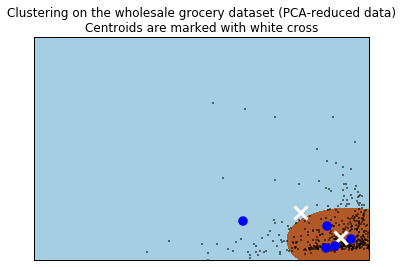

[[-30831.28637876   5617.14299482]
 [ -2131.22403243  -8154.75065897]
 [  1197.22467946  -6805.56090853]
 [  6569.80300475  -3474.23275362]
 [ -1594.00813173   3296.78938016]]


In [55]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

samples=clusters.sample(5)
plt.scatter(samples[:, 0], samples[:, 1],marker='.', s=169, linewidths=3,color='b', zorder=10)

plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print samples


[[-17879.18623839  10122.79246625]
 [  6987.95079141   4249.82914044]
 [   269.05318679  -6506.88683442]]


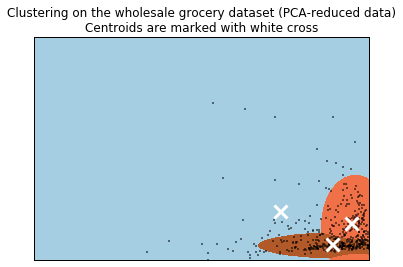

In [38]:
#with 3 clusters
clusters = GMM(n_components=3)
clusters.fit(reduced_data)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))


Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

centroids = clusters.means_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()



**7)** What are the central objects in each cluster? Describe them as customers.

Answer: GMM with two clusters seems to divide data better than GMM with 3 clusters. Central Objects seems to represent the centroids of 2 clusters(average customer in their respective clusters) which seperate the data into 2 categories.1st cluster(in brown) seems to belong to low volume customers with little variation in data and therefore are closer to each other and 2nd cluster(in blue) seems to represent high volume customers which might have large variations in their purchases depending on the nature of their use.This is also evident from the respective centroids of the clusters as 1st centroid seems to produce low purchase amounts(belonging to low volume customers) and 2nd centroid producing high purchase amounts(belonging to high volume customers).Same is true if we see the samples(dark blue dots on the plot) i.e the only sample having high purchase amount seems to be in blue coloured cluster dipicting high volume customers as compared to other 4 small purchase amounts which are part of brown coloured cluster belonging to low volume customers.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I felt that doing PCA analysis was the most crucial part of understanding the data at hand.It gave me a lot of information regarding maximum variation and also helped me decide on appropriate number of dimensions to be considered for this problem.This helped me to reduce the problem to its most essential features making the solution more robust and manageable.

**9)** How would you use that technique to help the company design new experiments?

Answer: Its clear from this problem that doing PCA analysis on the data can reveal a lot about the type of customers the store is catering.If we try to study the PCA dimensions further by using bi-plots we might be able to reveal interesting relations between products which might help the store to better target their premium customers.

When the company is aware of the cluster of customers,it can help them to create better A/B tests which in turn can help them to make smarter decisions and introduce targeted promotion campaigns.e.g.-We know from our PCA analysis that fresh items are the most popular items in the store.The store can design an A/B test to create different discount combos for fresh items and loyalty discounts for regular buyers.They can then test these on a set of low volume and high volume buyers.Based on the result they can implement the promising offers to wider audience of that cluster.

**10)** How would you use that data to help you predict future customer needs?

Answer: Based on the A/B testing results the company can modify its delivery methods and promotion campaigns to cater to different cluster of customers.Data from this can help the store to experiment with targeted combos,targeted discounts,loyalty benifit programs and express delivery services.

This analysis can also help the store to predict future popular items so that store can maintain availability.This can help them optimize their operations and reduce costs.